In [502]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pprint import pprint

# Supress any warnings
import warnings
warnings.filterwarnings('ignore')

# Import data into pandas dataframes
titanic_data = pd.read_csv('titanic_data.csv')
test  = pd.read_csv('test.csv' )

In [503]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [504]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [505]:
# Get familiar with the dataframe in the Titanic dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [506]:
# Check the variables(features) available with their data types
print (titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


Variable Definition	Key
- survival:	Survival	0 = No, 1 = Yes
- pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex:	Sex	
- Age:	Age in years	
- sibsp:	# of siblings / spouses aboard the Titanic	
- parch:	# of parents / children aboard the Titanic	
- ticket:	Ticket number	
- fare:	Passenger fare	
- cabin:	Cabin number	
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [507]:
# Drop useless columns that wont come in handy in the predicitions
titanic_df = titanic_data.drop(['Ticket', "PassengerId"], axis = 1)

# 1. Explanatory Data Analysis

## 1.1 Basic information about the data

In [508]:
# Rows vs columns in the dataset
titanic_df.shape

(891, 10)

In [509]:
# Survivals vs non-survivals
titanic_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

This will be our target variable as we intend to be build a model to predict survival rate among the Titanic
There is some balance in the number of survival vs non-survivals which will help in our predicition model as we have enough data to train and test against

In [510]:
# Glimpse on the data
titanic_df.head()
# transpose
# titanic_df.head(2).T

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [511]:
# We have significant number nulls in Age and Cabin which will not help when doing classification
titanic_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## 1.2 Basic visualizations about the data

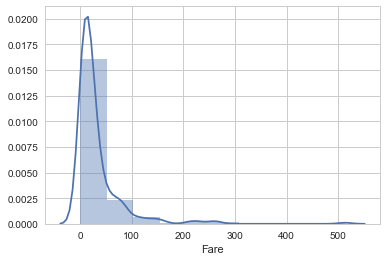

In [512]:
sns.distplot(titanic_df.Fare, bins=10, kde=True, rug=False, hist=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21d2dc10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a267f1c50>]], dtype=object)

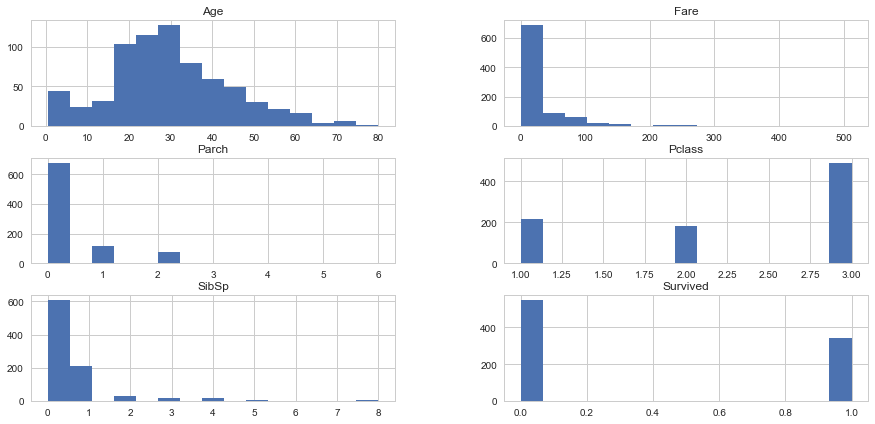

In [513]:
titanic_df.hist(bins=15, figsize=(15,7))

This gives us an idea of how the data looks like, where we can see that some variables like survived is a bool and Pclass is either 1, 2 or 3. We can see that the majority of passengers are in the age between 20 and 30 which I believe might be due to the migration from Europe to the US during the early 1900

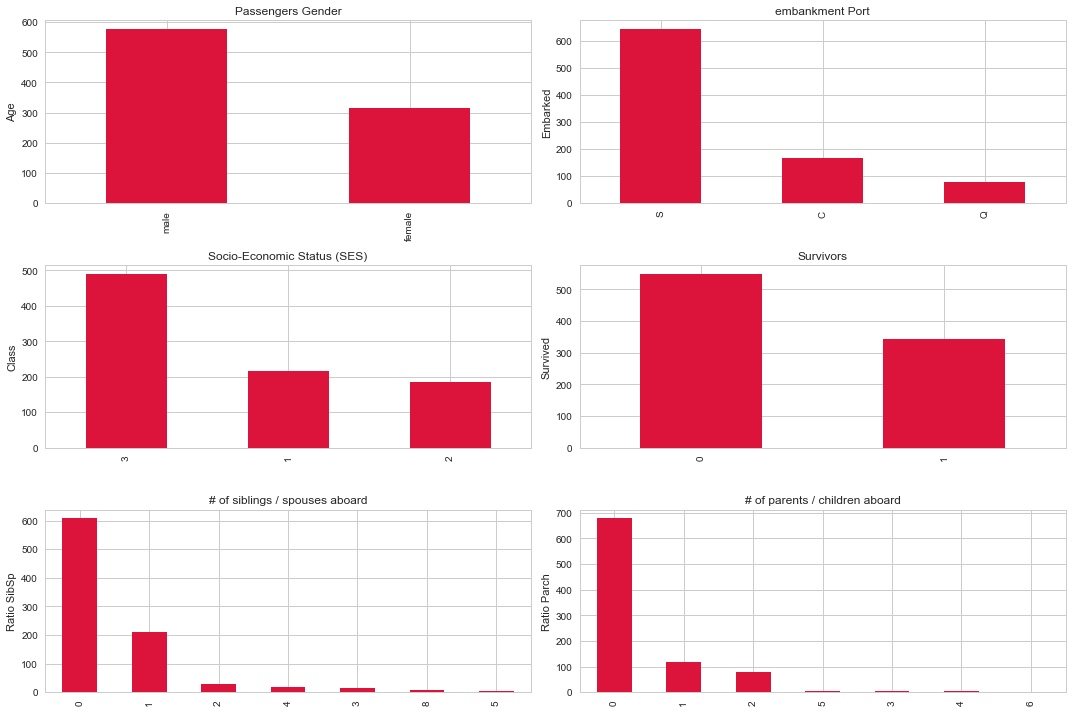

In [514]:
# Univariant plotting every variable on its own
fig = plt.figure
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)

titanic_df.Sex.value_counts().plot(kind='bar', color=['crimson'], ax=ax1,legend=False, figsize=(15,10))
ax1.set_title('Passengers Gender')
ax1.set_ylabel('Age')    

titanic_df.Embarked.value_counts().plot(kind='bar', color=['crimson'], ax=ax2,legend=False, figsize=(15,10))
ax2.set_title('embankment Port')
ax2.set_ylabel('Embarked') 

titanic_df.Pclass.value_counts().plot(kind='bar', color=['crimson'], ax=ax3,legend=False, figsize=(15,10))
ax3.set_title('Socio-Economic Status (SES)')
ax3.set_ylabel('Class') 

titanic_df.Survived.value_counts().plot(kind='bar', color=['crimson'], ax=ax4,legend=False, figsize=(15,10))
ax4.set_title('Survivors')
ax4.set_ylabel('Survived') 

titanic_df.SibSp.value_counts().plot(kind='bar', color=['crimson'], ax=ax5,legend=False, figsize=(15,10))
ax5.set_title('# of siblings / spouses aboard')
ax5.set_ylabel('Ratio SibSp') 

titanic_df.Parch.value_counts().plot(kind='bar', color=['crimson'], ax=ax6,legend=False, figsize=(15,10))
ax6.set_title('# of parents / children aboard')
ax6.set_ylabel('Ratio Parch') 

plt.tight_layout()

These bar graphs help us understand the volume of every feature in terms of data. We can observe the below:
- Males are double the number of female passengers
- Majority of passenger are from Southampton, England more than 600 passengers vs around 250 for the other 2 ports
- Class 3 is double every other class
- Those who survived are around half those who didnt survive

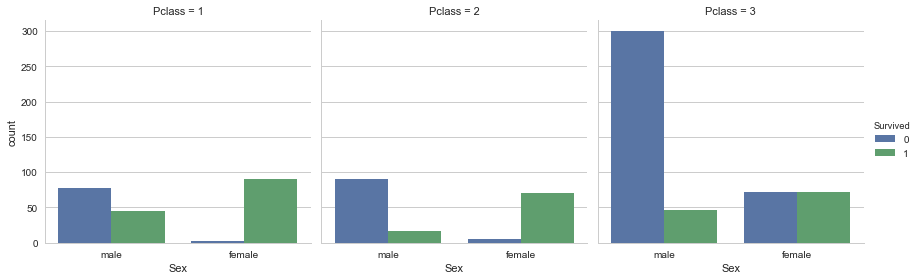

In [515]:
# The correlation map shows some correlation between some features with the highest positive correlation between SibSp and Parch and highest negative correlation between Pclass and Fare which is odd as I expected the Fare to increase with the Pclass.
# What is unexpected is the the positive correlation between the Survived feature and the Fare, although its not that of a high correlation it is something I wasn't expecting and discovered now.
# We can also see a high negative correlation between Survived and Pclass which makes sense because first they make the bulk of the passengers are we saw above and since they Pclass 3 are stuck at the bottom of the ship they perished first and was difficult to reach the life boats on the upper decksns.set_style("whitegrid")
sns.factorplot(x="Sex", hue="Survived", col="Pclass", data=titanic_df, kind='count')

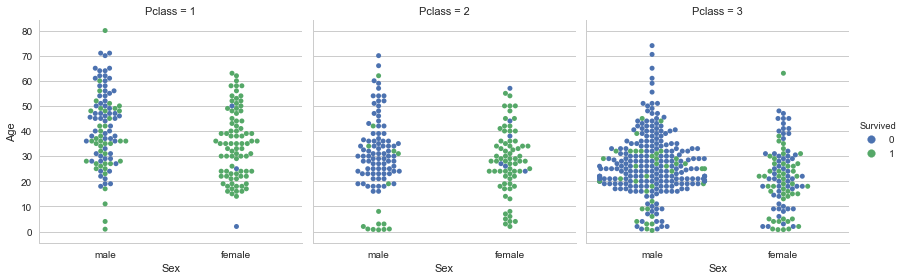

In [516]:
sns.factorplot(x="Sex", y="Age", hue="Survived", col="Pclass", data=titanic_df, kind="swarm")

We can see that almost all females in the Pclass 1 & 2 survived and it was 50/50 for females in the third class.
The high number of non-survivals  in the third section among men is huge and can cause the model to fail

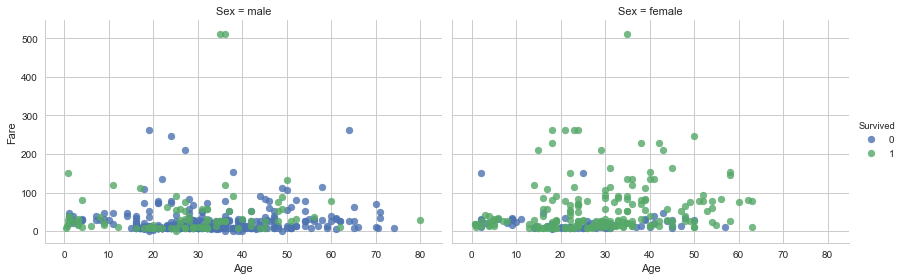

In [517]:
sns.set_style("whitegrid")
g = sns.FacetGrid(titanic_df, col="Sex", hue="Survived", size=4, aspect=1.5)
g.map(plt.scatter, "Age", "Fare", alpha=.8)
g.add_legend()

We have 3 outliers (2 males and 1 female) whom paid quite some high fare price and survived. I dont think this is wrong data because they seem to have paid identical Fare price but removing them should help the model training

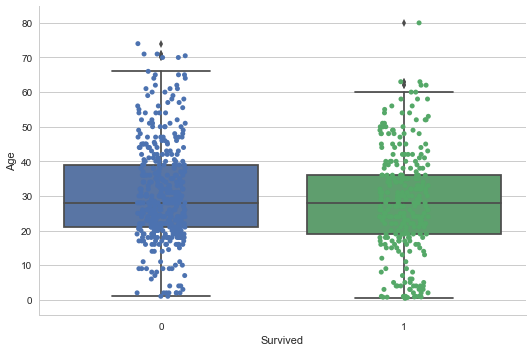

In [518]:
sns.factorplot(x="Survived", y="Age", data=titanic_df, kind='box',  size=5, aspect=1.5)
sns.stripplot(x="Survived", y="Age", data=titanic_df, jitter=True)

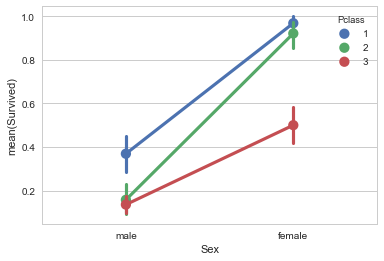

In [519]:
sns.pointplot(x="Sex", y="Survived", hue="Pclass", data=titanic_df)

As noted earlier we can see that almost all women in classes 1 & 2 survived vs 50% of the women in class 3 didnt make it. What is interesting is that clas 2 has the most variation between both gender, where males mostly didnt survive unlike females whom rated are close to that of class 1 knowing that these classes had the same number of passangers

## 1.3 Dealing with Missing Data
We have 3 features with missing values

#### Filling Embarked missing datapoints

In [520]:
# Embarked total of 2 datapoints
titanic_df[titanic_df.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,B28,NaN


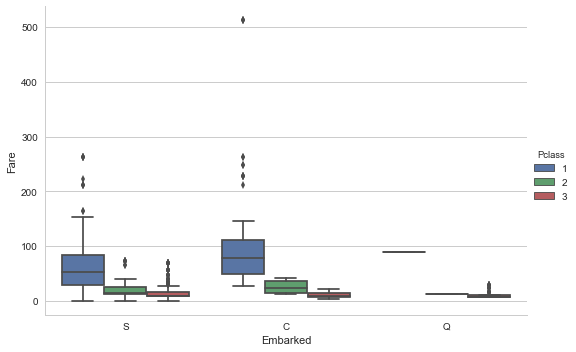

In [521]:
sns.factorplot(data=titanic_df, x="Embarked", y="Fare", hue='Pclass', kind='box', size=5, aspect=1.5)

We know from the above visualization that Pclass 1 most probably embarked from S or C.
Looking at the fare price which is 80, I will replace the null with Embarked C as the Fare median is closest to what they paid.

In [522]:
titanic_df.Embarked = titanic_df.Embarked.fillna('C')

#### Filling Age missing datapoints

In [523]:
# Age total of 177 datapoints
age_null = titanic_df[titanic_df.Age.isnull()]
age_null.Sex.value_counts()

male      124
female     53
Name: Sex, dtype: int64

In [524]:
age_null.Survived.value_counts()

0    125
1     52
Name: Survived, dtype: int64

In [525]:
age_null.Embarked.value_counts()

S    90
Q    49
C    38
Name: Embarked, dtype: int64

In [526]:
age_null.Pclass.value_counts()

3    136
1     30
2     11
Name: Pclass, dtype: int64

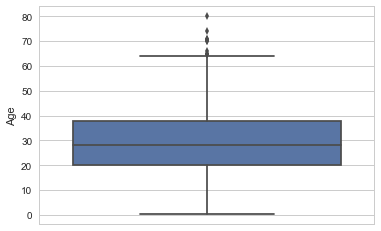

In [527]:
sns.boxplot(data=titanic_df, y='Age')

Replace null with the median age of the passengers from the total dataset because looking at the above it doesn't seem that the missign data is exclusive to any of the other features

In [528]:
titanic_df.Age = titanic_df.Age.fillna(value = titanic_df.Age.mean())

# 2. Feature Engineering

## 2.1 Feature Creation

>Deck Feature

In [529]:
# Cabin total missing values is 687 of the 891 which gets me to question how useful is this feature in the prediction
# Create new feature by Stripping the Deck location from the Cabin variable
titanic_df['Deck'] = titanic_df.Cabin.str[0]
titanic_df['Deck'] = titanic_df['Deck'].fillna('0')
# titanic_df.sort_values('Deck', ascending=True)

In [530]:
titanic_df.Deck.value_counts()

0    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Deck, dtype: int64

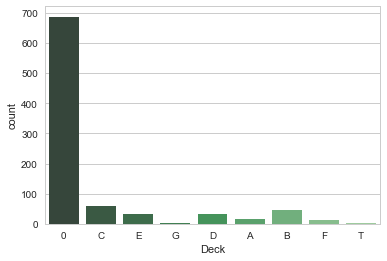

In [531]:
sns.countplot(x='Deck', data=titanic_df, palette="Greens_d")

>Age Category

In [532]:
# Age group classifications
age_bins = [0, 2, 14, 24, 65, 120]
age_labels = ["Infants", "Children", "Youth", "Adults", "Seniors"]
titanic_df['Age_cat'] = pd.cut(titanic_df['Age'], age_bins, labels=age_labels, right=True, include_lowest=True)
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,Age_cat
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,0,Youth
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,C,Adults
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0,Adults
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,C,Adults
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0,Adults


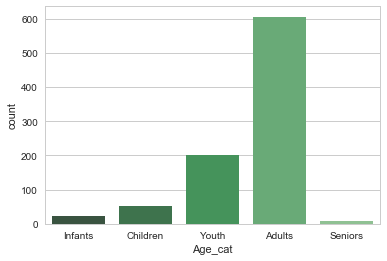

In [533]:
sns.countplot(x='Age_cat', data=titanic_df, palette="Greens_d")

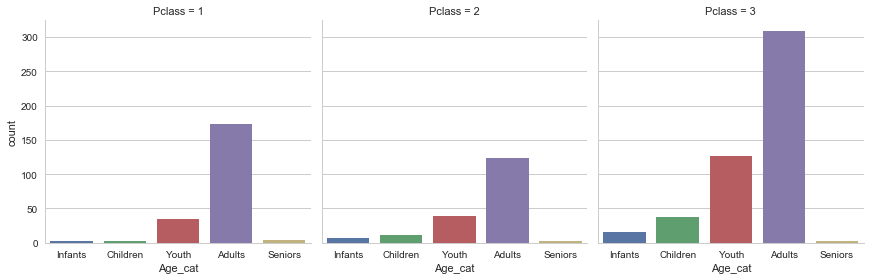

In [534]:
sns.factorplot(x="Age_cat", col="Pclass", data=titanic_df, kind="count")

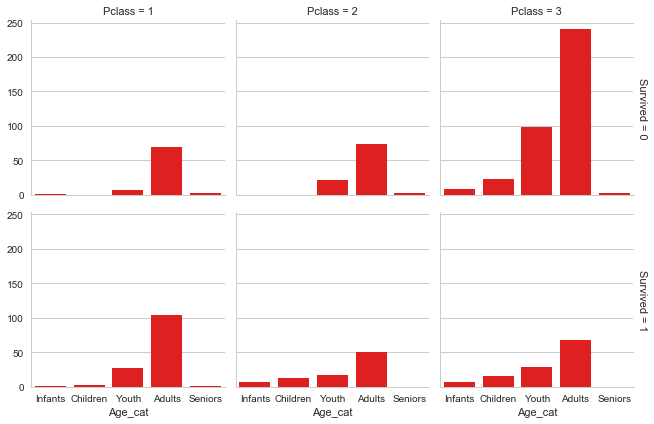

In [535]:
g = sns.FacetGrid(titanic_df, col="Pclass",  row="Survived", margin_titles=True)
g = g.map(sns.countplot, "Age_cat", color="r")

>Travel Status (Single vs Family)

In [536]:
titanic_df['Travel_status'] = titanic_df.SibSp + titanic_df.Parch +1
titanic_df['Travel_status'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Travel_status, dtype: int64

In [537]:
travel_bins = [0, 1, 11]
travel_labels = ["Single", "Family"]
titanic_df['Travel_cat'] = pd.cut(titanic_df['Travel_status'], travel_bins, labels=travel_labels, \
                                  right=True, include_lowest=True)

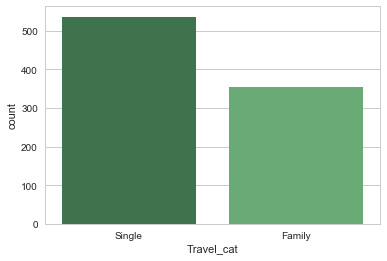

In [538]:
sns.countplot(x='Travel_cat', data=titanic_df, palette="Greens_d")

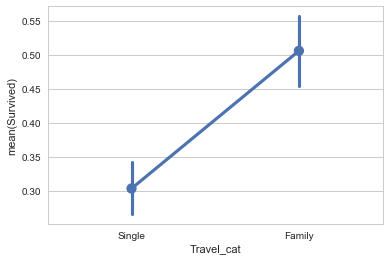

In [539]:
sns.pointplot(x="Travel_cat", y="Survived", data=titanic_df)

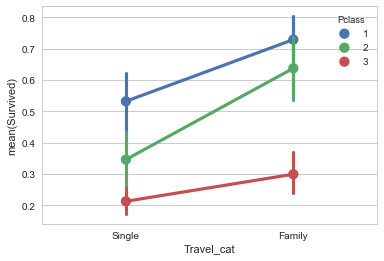

In [540]:
sns.pointplot(x="Travel_cat", y="Survived", hue="Pclass", data=titanic_df)

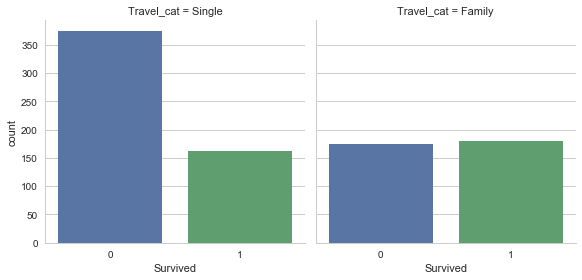

In [541]:
sns.factorplot(x="Survived", col="Travel_cat", data=titanic_df, kind="count")

>Title Feature

In [542]:
# Learned from https://www.kaggle.com/sinakhorami/titanic-best-working-classifier
titanic_df['Title'] = titanic_df.Name.str.extract('([a-zA-Z]+)\.')

In [543]:
titanic_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
Name: Title, dtype: int64

In [544]:
titanic_df.Title.replace(['Lady','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', \
                          'Sir','Jonkheer', 'Dona'], 'other', inplace=True, regex=True)
titanic_df.Title.replace('Mlle', 'Miss', inplace=True, regex=True)
titanic_df.Title.replace('Ms', 'Miss', inplace=True, regex=True)
titanic_df.Title.replace('Mme', 'Mrs', inplace=True, regex=True)

In [545]:
pd.crosstab(titanic_df['Title'], titanic_df['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
other,3,20


In [546]:
# corr = titanic_df.corr()

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,annot=True,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})
# plt.title('Correlation between features')

Here again we can't see perfect correlation which means that non of the variables are identical and might cause overfitting.
The correlation map also shows some correlation between some features with the highest positive correlation between SibSp and Parch and highest negative correlation between Pclass and Fare which is odd as I expected the Fare to increase with the Pclass.
What is unexpected is the the positive correlation between the Survived feature and the Fare, although its not that of a high correlation it is something I wasn't expecting and discovered now.
We can also see a high negative correlation between Survived and Pclass which makes sense because first they make the bulk of the passengers are we saw above and since they Pclass 3 are stuck at the bottom of the ship they perished first and was difficult to reach the life boats on the upper deck

# 3.0 Data Preprosessing
http://scikit-learn.org/stable/modules/preprocessing.html

#### Lets map categorical variables to numerical variables and select features

In [547]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Cabin            204 non-null object
Embarked         891 non-null object
Deck             891 non-null object
Age_cat          891 non-null category
Travel_status    891 non-null int64
Travel_cat       891 non-null category
Title            891 non-null object
dtypes: category(2), float64(2), int64(5), object(6)
memory usage: 92.6+ KB


In [548]:
# Mapping Age
mapping_age = {'Adults':0, 'Youth':1, 'Children':2, 'Infants':3, 'Seniors':4}
titanic_df['Age_cat'] = titanic_df['Age_cat'].map(mapping_age)

# Mapping Travel
mapping_travel = {'Single':0, 'Family':1}
titanic_df['Travel_cat'] = titanic_df['Travel_cat'].map(mapping_travel)


# Mapping Sex
mapping_sex = {'male':0, 'female':1}
titanic_df['Sex'] = titanic_df['Sex'].map(mapping_sex)

# Mapping Embarked
titanic_df['Embarked'] = titanic_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

# Mapping Fare
titanic_df.loc[titanic_df['Fare'] <= 7.91, 'Fare'] = 0
titanic_df.loc[(titanic_df['Fare'] > 7.91) & (titanic_df['Fare'] <= 14.4), 'Fare'] = 1
titanic_df.loc[(titanic_df['Fare'] > 14.4) & (titanic_df['Fare'] <= 31), 'Fare'] = 2
titanic_df.loc[(titanic_df['Fare'] > 31), 'Fare'] = 3
titanic_df['Fare'] = titanic_df['Fare'].astype(int)

# Mapping title
mapping_title = {'Mr':0, 'Mrs':1, 'Miss':2, 'Master':3, 'other':4}
titanic_df['Title'] = titanic_df.Title.map( mapping_title )

In [549]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,Age_cat,Travel_status,Travel_cat,Title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,0,NaN,0,0,1,2,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,3,C85,1,C,0,2,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,1,NaN,0,0,0,1,0,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3,C123,0,C,0,2,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,1,NaN,0,0,0,1,0,0


In [550]:
# null_columns=titanic_df.columns[titanic_df.isnull().any()]
# titanic_df[titanic_df["Title"].isnull()][null_columns]
# titanic_df[titanic_df["Title"].isnull()]

In [497]:
# Feature selection
train = titanic_df[['Survived','Pclass', 'Sex', 'Embarked', 'Age_cat', 'Fare', 'Travel_status', 'Title']]

In [501]:
train.head()

,Survived,Pclass,Sex,Embarked,Age_cat,Fare,Travel_status,Title
0,0,3,0,0,1,0,2,0
1,1,1,1,1,0,3,2,1
2,1,3,1,0,0,1,1,2
3,1,1,1,0,0,3,2,1
4,0,3,0,0,0,1,1,0


In [146]:
# This is how to do preproscessing with Sklearn to create a tidy data where every column is a datapoint

# labels = titanic_df['Survived']
# features = titanic_df[['Pclass', 'Fare']] # Check if u add the source features

# # Transforms feature from categorical to numerical 
# from sklearn import preprocessing
# encoder_sex = preprocessing.LabelEncoder()
# encoder_travel = preprocessing.LabelEncoder()
# features['Sex'] = encoder_sex.fit_transform(titanic_df['Sex'])
# features['Travel_cat'] = encoder_travel.fit_transform(titanic_df['Travel_cat'])

# #get dummy units for Embarked/Age_cat
# dummy_units_a = pd.get_dummies(titanic_df['Embarked'], prefix='Embarked')
# features = features.join(dummy_units_a)

# dummy_units_b = pd.get_dummies(titanic_df['Age_cat'], prefix='Age_cat')
# features = features.join(dummy_units_b)

# features.head()

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cross_validation import StratifiedShuffleSplit, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import grid_search

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [58]:
# Split data between training and testing
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = \
train_test_split(features, labels, test_size=0.33, random_state=42)

>Train Test decision tree with all features and default parameter

In [64]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state = 53)
clf = clf.fit(features_train, labels_train)

print "Decision tree accuracy score:"
print clf.score(features_test, labels_test)

print "\nDecision tree parameters:"
pprint(clf.get_params())

Decision tree accuracy score:
0.776271186441

Decision tree parameters:
{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 53,
 'splitter': 'best'}


# 4.0 Feature Selection

In [76]:
# Create features list
features_list = features.columns

In [78]:
N_FEATURES_OPTIONS = np.arange(1, len(features_list))

pipe = Pipeline([
    ('reduce_dim', SelectKBest()),
    ('classify', DecisionTreeClassifier(random_state = 42))
])


param_grid = [
    {
        'reduce_dim__k': N_FEATURES_OPTIONS
    }
]

gs = grid_search.GridSearchCV(estimator = pipe, cv=10, param_grid=param_grid)
gs.fit(features_train, labels_train)
print(gs.best_estimator_)


print "Best number of features from parameter grid:"
print gs.best_params_
best_param = gs.best_params_.get('reduce_dim__k')


Pipeline(memory=None,
     steps=[('reduce_dim', SelectKBest(k=8, score_func=<function f_classif at 0x1a1e59cb18>)), ('classify', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))])
Best number of features from parameter grid:
{'reduce_dim__k': 8}


In [79]:
skbest = SelectKBest(k = best_param)
sk_transform = skbest.fit(features_train, labels_train)
mask = skbest.get_support(True)

for i in mask:
    print '%s score: %f' % (features_list[i + 1], skbest.scores_[i])

Fare score: 63.911740
Sex score: 35.374998
Travel_cat score: 228.852503
Embarked_C score: 17.887149
Embarked_Q score: 23.550096
Age_cat_Infants score: 17.863517
Age_cat_Children score: 4.540973
Age_cat_Youth score: 3.205269


# 4.0 Modeling

In [81]:
tree_pipe = Pipeline([
    ('select_features', SelectKBest(k = best_param)),
    ('classify', DecisionTreeClassifier(random_state = 53)),
])

param_grid = dict(classify__min_samples_leaf =  [1, 2, 3, 4, 5, 10, 20], 
                  classify__min_samples_split = [2, 8, 10, 20],
                  classify__max_depth = [None, 2, 4, 8, 10, 15],
                  classify__criterion =  ['gini', 'entropy'])

tree_clf = grid_search.GridSearchCV(estimator = tree_pipe, param_grid = param_grid, scoring='f1', cv=10)
    
tree_clf.fit(features_train, labels_train)
    
pred = tree_clf.predict(features_test)

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
acc = accuracy_score(pred, labels_test)
prec = precision_score(pred, labels_test)
recal = recall_score(pred, labels_test)
f1 = f1_score(pred, labels_test)
print "accuracy_score:", acc, "Precision: ", prec, "Recall: ", recal, "f1_score: ", f1

accuracy_score: 0.793220338983 Precision:  0.75 Recall:  0.743801652893 f1_score:  0.746887966805


In [83]:
tree_clf.fit(features, labels)
clf = tree_clf.best_estimator_
print clf

Pipeline(memory=None,
     steps=[('select_features', SelectKBest(k=8, score_func=<function f_classif at 0x1a1e59cb18>)), ('classify', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=53,
            splitter='best'))])
